In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('../data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
pd.DataFrame(data={'NaN_count': df.isna().sum(), 'unique_values': df.nunique(), 'data_types': df.dtypes})

,NaN_count,unique_values,data_types
Id,0,1460,int64
MSSubClass,0,15,int64
MSZoning,0,5,object
LotFrontage,259,110,float64
LotArea,0,1073,int64
Street,0,2,object
Alley,1369,2,object
LotShape,0,4,object
LandContour,0,4,object
Utilities,0,2,object


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X, y = df.drop('SalePrice', axis=1), df['SalePrice']

# Делаем "корзины" для стратификации
y_bins = pd.qcut(y, q=10, duplicates="drop")  # q=10 значит 10 равных по количеству интервалов

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y_bins, random_state=42)

In [9]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1168, 80), (1168,), (292, 80), (292,))

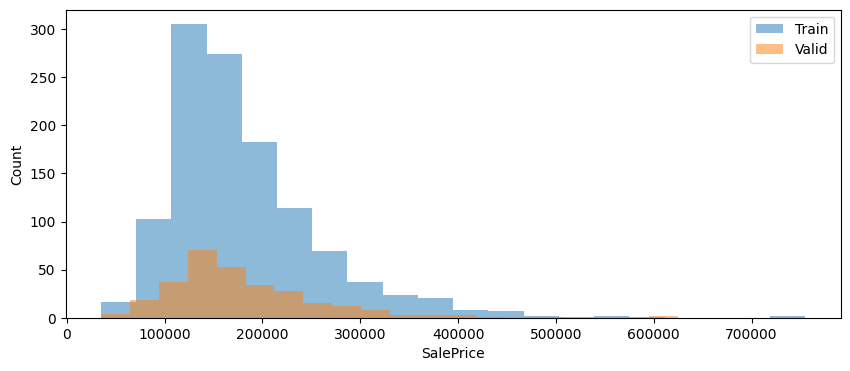

In [10]:
plt.figure(figsize=(10,4))

plt.hist(y_train, bins=20, alpha=0.5, label="Train")
plt.hist(y_valid, bins=20, alpha=0.5, label="Valid")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.legend()
plt.show()

In [11]:
# # Берем только числовые колонки
# num_cols = X_train.select_dtypes(include='number').columns

# # Размер сетки: подстраиваем под число признаков
# n_cols = 3  # сколько графиков в строке
# n_rows = (len(num_cols) + n_cols - 1) // n_cols

# plt.figure(figsize=(15, 5 * n_rows))

# for i, col in enumerate(num_cols, 1):
#     plt.subplot(n_rows, n_cols, i)
#     plt.hist(X_train[col].dropna(), bins=30, color='skyblue', edgecolor='black')
#     plt.title(col)
#     plt.grid(axis='y', linestyle='--', alpha=0.6)

# plt.tight_layout()
# plt.show()

In [12]:
# # выделим категориальные признаки
# cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

# n_cols = 3  # сколько графиков в строке
# n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # число строк

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
# axes = axes.flatten()

# for i, col in enumerate(cat_cols):
#     X_train[col].value_counts().plot(
#         kind='bar',
#         ax=axes[i],
#         color='skyblue',
#         edgecolor='black'
#     )
#     axes[i].set_title(f'{col} (value counts)')
#     axes[i].set_xlabel('')
#     axes[i].set_ylabel('Count')

# # если осей больше, чем графиков — уберём лишние
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()

In [13]:
# # берем только числовые признаки
# num_cols = X_train.select_dtypes(include='number').columns

# # считаем корреляцию
# corr_matrix = X_train[num_cols].corr()

# # рисуем тепловую карту
# plt.figure(figsize=(12, 10))
# sns.heatmap(
#     corr_matrix,
#     # annot=True,       # показать числа на карте
#     fmt=".2f",        # формат чисел
#     cmap="coolwarm",  # цветовая схема
#     cbar=True
# )
# plt.title("Correlation Matrix")
# plt.show()

In [14]:
# Соединяем X_train с y_train для удобства
train_data = X_train.copy()
train_data['SalePrice'] = y_train

# Берем только числовые колонки
num_cols = train_data.select_dtypes(include='number').columns

# Считаем корреляцию всех числовых признаков с целевой
corr_with_target = train_data[num_cols].corr()['SalePrice'].sort_values(ascending=False)

corr_df = corr_with_target.reset_index()
corr_df.columns = ['Feature', 'Correlation']

In [15]:
from IPython.display import display
display(corr_df)

,Feature,Correlation
0,SalePrice,1.000000
1,OverallQual,0.790316
2,GrLivArea,0.705177
3,GarageCars,0.637729
4,GarageArea,0.608436
5,TotalBsmtSF,0.599422
6,1stFlrSF,0.598041
7,FullBath,0.553092
8,TotRmsAbvGrd,0.517919
9,YearRemodAdd,0.513843


In [16]:
# # Сортируем по абсолютной величине корреляции (по желанию)
# corr_df_sorted = corr_df.sort_values(by='Correlation', ascending=True)  # для горизонтального barplot

# plt.figure(figsize=(10, 12))
# sns.barplot(
#     x='Correlation',
#     y='Feature',
#     data=corr_df_sorted,
#     palette='coolwarm'
# )
# plt.title('Correlation of features with SalePrice')
# plt.xlabel('Correlation')
# plt.ylabel('Feature')
# plt.tight_layout()
# plt.show()

In [17]:
# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing
from sklearn.impute import SimpleImputer

# Важная настройка для корректной настройки pipeline!
import sklearn
sklearn.set_config(transform_output="pandas")

In [18]:
drop_features = ['BsmtHalfBath', 'BsmtFinSF2', 'MiscVal', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr', 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Utilities']

num_features = ['LotFrontage', 'GarageYrBlt']
cat_features = ['MasVnrType', 'FireplaceQu', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

my_imputer = ColumnTransformer(
    transformers=[
        ('drop_features', 'drop', drop_features),
        ('num_imputer', SimpleImputer(strategy='mean'), num_features),
        ('cat_imputer', SimpleImputer(strategy="constant", fill_value="no_information"), cat_features)
    ],
    verbose_feature_names_out=False,
    remainder='passthrough'
)

In [19]:
filled_data = my_imputer.fit_transform(X_train)

In [20]:
pd.DataFrame(data={'NaN_count': filled_data.isna().sum(), 'unique_values': filled_data.nunique(), 'data_type':filled_data.dtypes})

,NaN_count,unique_values,data_type
LotFrontage,0,107,float64
GarageYrBlt,0,98,float64
MasVnrType,0,4,object
FireplaceQu,0,6,object
BsmtQual,0,5,object
BsmtCond,0,5,object
BsmtExposure,0,5,object
BsmtFinType1,0,7,object
BsmtFinType2,0,7,object
Electrical,0,6,object


In [21]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

In [22]:
#бинарные и 3 колонки через OneHot
#остальные через Ordinal

cat_features_ohe = ['Street', 'CentralAir', 'MasVnrType', 'GarageFinish', 'LandSlope', 'PavedDrive']
cat_features_ord = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageQual', 'GarageCond', 'MSZoning', 'LotShape',
                    'LandContour', 'LotConfig', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC',
                    'KitchenQual', 'Functional', 'SaleType', 'SaleCondition', 'Neighborhood', 'Exterior1st', 'Exterior2nd']

my_encoder = ColumnTransformer(
    transformers=[
        ('cat_ohe', OneHotEncoder(sparse_output=False), cat_features_ohe),
        ('cat_ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_features_ord),
    ],
    verbose_feature_names_out = False,
    remainder = 'passthrough' 
)

In [23]:
y_train_log = np.log1p(y_train)  # log(1 + y)
y_valid_log = np.log1p(y_valid)

In [24]:
encoded_data = my_encoder.fit_transform(filled_data, y_train_log)

encoded_data.head()

,Street_Grvl,Street_Pave,CentralAir_N,CentralAir_Y,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,MasVnrType_no_information,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_no_information,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,PavedDrive_N,PavedDrive_P,PavedDrive_Y,FireplaceQu,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageQual,GarageCond,MSZoning,LotShape,LandContour,LotConfig,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,KitchenQual,Functional,SaleType,SaleCondition,Neighborhood,Exterior1st,Exterior2nd,LotFrontage,GarageYrBlt,Id,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MoSold
232,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,1.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,2.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,1.0,3.0,3.0,5.0,8.0,4.0,2.0,6.0,6.0,21.000000,1972.0,233,1680,6,1972,1972,297.0,0,483,483,483,504,987,0,1,1,2,5,1,1,288,0,0,0,0,0,6
1147,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,3.0,3.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,3.0,0.0,4.0,2.0,2.0,0.0,5.0,1.0,1.0,3.0,4.0,1.0,1.0,0.0,1.0,5.0,8.0,4.0,6.0,8.0,8.0,75.000000,1941.0,1148,12000,7,1941,1950,0.0,275,429,704,860,704,1564,0,1,1,3,7,1,1,234,0,0,0,0,0,7
747,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,0.0,3.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,0.0,3.0,0.0,2.0,2.0,0.0,5.0,4.0,1.0,2.0,4.0,4.0,2.0,3.0,2.0,5.0,8.0,4.0,17.0,11.0,12.0,65.000000,1950.0,748,11700,7,1880,2003,0.0,0,1240,1240,1320,1320,2640,0,1,1,4,8,1,4,864,181,0,0,0,0,5
581,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,4.0,4.0,3.0,3.0,3.0,4.0,2.0,2.0,0.0,2.0,3.0,1.0,0.0,4.0,2.0,1.0,0.0,0.0,5.0,6.0,5.0,16.0,12.0,13.0,98.000000,2009.0,582,12704,8,2008,2009,306.0,0,2042,2042,2042,0,2042,0,2,1,3,8,1,3,1390,0,90,0,0,0,8
1318,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,3.0,1.0,5.0,5.0,4.0,1.0,4.0,4.0,3.0,1.0,3.0,1.0,2.0,2.0,0.0,2.0,3.0,1.0,2.0,4.0,2.0,1.0,0.0,2.0,5.0,8.0,4.0,5.0,12.0,13.0,70.425732,2001.0,1319,14781,8,2001,2002,178.0,0,1753,1753,1787,0,1787,0,2,0,3,7,1,3,748,198,150,0,0,0,8


In [25]:
#нормализовать SF, Area, Porch, ID оставить как есть

num_std = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', '3SsnPorch',
           'ScreenPorch']

my_scaler = ColumnTransformer(
    transformers=[
        ('std_scaler', StandardScaler(), num_std)
    ], 
    verbose_feature_names_out = False,
    remainder = 'passthrough'
)

In [26]:
scaled_data = my_scaler.fit_transform(encoded_data, y_train_log)

scaled_data.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,3SsnPorch,ScreenPorch,Street_Grvl,Street_Pave,CentralAir_N,CentralAir_Y,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,MasVnrType_no_information,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_no_information,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,PavedDrive_N,PavedDrive_P,PavedDrive_Y,FireplaceQu,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageQual,GarageCond,MSZoning,LotShape,LandContour,LotConfig,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,KitchenQual,Functional,SaleType,SaleCondition,Neighborhood,Exterior1st,Exterior2nd,LotFrontage,GarageYrBlt,Id,OverallQual,YearBuilt,YearRemodAdd,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold
232,-0.986318,1.063318,-0.969238,-0.191240,-1.306878,-1.786692,0.362831,-1.002995,-0.881331,-0.747547,-0.697537,-0.076845,-0.110789,-0.272936,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,1.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,2.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,1.0,3.0,3.0,5.0,8.0,4.0,2.0,6.0,6.0,21.000000,1972.0,233,6,1972,1972,0,1,1,2,5,1,1,6
1147,0.171545,-0.578458,-0.371549,-0.313457,-0.805033,-0.804140,0.819736,0.083434,-1.139852,-0.747547,-0.697537,-0.076845,-0.110789,-0.272936,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,3.0,3.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,3.0,0.0,4.0,2.0,2.0,0.0,5.0,1.0,1.0,3.0,4.0,1.0,1.0,0.0,1.0,5.0,8.0,4.0,6.0,8.0,8.0,75.000000,1941.0,1148,7,1941,1950,0,1,1,3,7,1,1,7
747,0.137886,-0.578458,-0.969238,1.522064,0.412112,0.394729,2.227005,2.109426,1.876232,0.733925,-0.697537,-0.076845,-0.110789,-0.272936,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,0.0,3.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,0.0,3.0,0.0,2.0,2.0,0.0,5.0,4.0,1.0,2.0,4.0,4.0,2.0,3.0,2.0,5.0,8.0,4.0,17.0,11.0,12.0,65.000000,1950.0,748,7,1880,2003,0,1,1,4,8,1,4,5
581,0.250531,1.113069,-0.969238,3.337216,2.233288,2.276433,-0.788571,0.983456,4.394423,-0.747547,0.623874,-0.076845,-0.110789,-0.272936,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,4.0,4.0,3.0,3.0,3.0,4.0,2.0,2.0,0.0,2.0,3.0,1.0,0.0,4.0,2.0,1.0,0.0,0.0,5.0,6.0,5.0,16.0,12.0,13.0,98.000000,2009.0,582,8,2008,2009,0,2,1,3,8,1,3,8
1318,0.483562,0.405502,-0.969238,2.683128,1.577029,1.611842,-0.788571,0.503319,1.320890,0.873068,1.504814,-0.076845,-0.110789,-0.272936,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,3.0,1.0,5.0,5.0,4.0,1.0,4.0,4.0,3.0,1.0,3.0,1.0,2.0,2.0,0.0,2.0,3.0,1.0,2.0,4.0,2.0,1.0,0.0,2.0,5.0,8.0,4.0,5.0,12.0,13.0,70.425732,2001.0,1319,8,2001,2002,0,2,0,3,7,1,3,8


In [27]:
preprocessor = Pipeline(
    [
        ('imputer', my_imputer),
        ('encoder', my_encoder),
        ('scaler', my_scaler)
    ]
)

In [28]:
preprocessor.fit_transform(X_train).head() # Обучаем весь препроцессинг и сразу же трансформируем наши входные данные

,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,3SsnPorch,ScreenPorch,Street_Grvl,Street_Pave,CentralAir_N,CentralAir_Y,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,MasVnrType_no_information,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_no_information,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,PavedDrive_N,PavedDrive_P,PavedDrive_Y,FireplaceQu,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageQual,GarageCond,MSZoning,LotShape,LandContour,LotConfig,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,KitchenQual,Functional,SaleType,SaleCondition,Neighborhood,Exterior1st,Exterior2nd,LotFrontage,GarageYrBlt,Id,OverallQual,YearBuilt,YearRemodAdd,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold
232,-0.986318,1.063318,-0.969238,-0.191240,-1.306878,-1.786692,0.362831,-1.002995,-0.881331,-0.747547,-0.697537,-0.076845,-0.110789,-0.272936,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,1.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,2.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,1.0,3.0,3.0,5.0,8.0,4.0,2.0,6.0,6.0,21.000000,1972.0,233,6,1972,1972,0,1,1,2,5,1,1,6
1147,0.171545,-0.578458,-0.371549,-0.313457,-0.805033,-0.804140,0.819736,0.083434,-1.139852,-0.747547,-0.697537,-0.076845,-0.110789,-0.272936,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,3.0,3.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,3.0,0.0,4.0,2.0,2.0,0.0,5.0,1.0,1.0,3.0,4.0,1.0,1.0,0.0,1.0,5.0,8.0,4.0,6.0,8.0,8.0,75.000000,1941.0,1148,7,1941,1950,0,1,1,3,7,1,1,7
747,0.137886,-0.578458,-0.969238,1.522064,0.412112,0.394729,2.227005,2.109426,1.876232,0.733925,-0.697537,-0.076845,-0.110789,-0.272936,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,0.0,3.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,0.0,3.0,0.0,2.0,2.0,0.0,5.0,4.0,1.0,2.0,4.0,4.0,2.0,3.0,2.0,5.0,8.0,4.0,17.0,11.0,12.0,65.000000,1950.0,748,7,1880,2003,0,1,1,4,8,1,4,5
581,0.250531,1.113069,-0.969238,3.337216,2.233288,2.276433,-0.788571,0.983456,4.394423,-0.747547,0.623874,-0.076845,-0.110789,-0.272936,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,4.0,4.0,3.0,3.0,3.0,4.0,2.0,2.0,0.0,2.0,3.0,1.0,0.0,4.0,2.0,1.0,0.0,0.0,5.0,6.0,5.0,16.0,12.0,13.0,98.000000,2009.0,582,8,2008,2009,0,2,1,3,8,1,3,8
1318,0.483562,0.405502,-0.969238,2.683128,1.577029,1.611842,-0.788571,0.503319,1.320890,0.873068,1.504814,-0.076845,-0.110789,-0.272936,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,3.0,1.0,5.0,5.0,4.0,1.0,4.0,4.0,3.0,1.0,3.0,1.0,2.0,2.0,0.0,2.0,3.0,1.0,2.0,4.0,2.0,1.0,0.0,2.0,5.0,8.0,4.0,5.0,12.0,13.0,70.425732,2001.0,1319,8,2001,2002,0,2,0,3,7,1,3,8


In [29]:
# from sklearn.ensemble import RandomForestRegressor

In [30]:
# rf = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42)

# ml_pipeline_rf = Pipeline(
#     [
#         ('preprocessor', preprocessor),
#         ('model', rf)
#     ]
# )

In [31]:
# ml_pipeline_rf.fit(X_train, y_train_log)

In [32]:
# y_pred_log = ml_pipeline_rf.predict(X_valid)
# y_pred = np.expm1(y_pred_log)  # возвращаемся в исходный масштаб

In [33]:
# X_valid.shape, y_pred.shape

In [34]:
from sklearn.metrics import mean_squared_log_error
# rmsle = np.sqrt(mean_squared_log_error(y_valid, y_pred))
# print("RMSLE:", rmsle)

In [35]:
from catboost import CatBoostRegressor

In [36]:
cb = CatBoostRegressor(
    iterations=1000,
    depth=6,
    learning_rate=0.1,
    l2_leaf_reg=10,          
    eval_metric='RMSE',
    random_state=42,
    verbose=0
)

ml_pipeline_cb = Pipeline([
    ('preprocessor', preprocessor),
    ('model', cb)
])

In [37]:
ml_pipeline_cb.fit(X_train, y_train_log)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('imputer', ...), ('encoder', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('drop_features', ...), ('num_imputer', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3


In [38]:
y_pred_log = ml_pipeline_cb.predict(X_valid)
y_pred = np.expm1(y_pred_log)

In [39]:
rmsle = np.sqrt(mean_squared_log_error(y_valid, y_pred))
print("RMSLE:", rmsle)

RMSLE: 0.1210724719873136


In [40]:
from sklearn.metrics import r2_score

r2 = r2_score(y_valid, y_pred)
print('R2:', r2)

R2: 0.9048507220705899


In [41]:
test_X = pd.read_csv('../data/test.csv')

In [42]:
y_pred_test_log = ml_pipeline_cb.predict(test_X)
y_pred_test = np.expm1(y_pred_test_log)

In [43]:
submission = pd.DataFrame({
    'Id': test_X['Id'],
    'SalePrice': y_pred_test
})

In [44]:
# submission.to_csv('submission.csv', index=False)